## Artificial Intelligence | 4022 | Dr. Fadaei
## Assignment #03
***
### Amirreza Akbari | 810899045
### 1402/02/09

## Install & Import Libraries

In [82]:
import importlib.util

required_libraries = ["numpy", "pandas", "matplotlib", "tensorflow", "scikit-learn"]

for lib in required_libraries:
    if importlib.util.find_spec(lib) is None:
        # Install the library
        !pip install {lib}

import os
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import preprocess_input
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import homogeneity_score, silhouette_score
from sklearn.decomposition import PCA


## Preprocessing and Feature Extraction

In [83]:
# Load the pre-trained VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False)

# Remove the fully connected layers to obtain feature extraction part
feature_extractor = Model(inputs=base_model.input, outputs=base_model.output)

# Function to preprocess and extract features from an image
def extract_features(img_path, model, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = model.predict(x)
    return features.flatten()  # Flatten features into a 1D array

# Directory containing the flower images
image_dir = "flower_images"

# List to store extracted features
features_list = []

# Iterate through each image file in the directory
for filename in sorted(os.listdir(image_dir)):
    if filename.endswith(".png"):
        img_path = os.path.join(image_dir, filename)
        features = extract_features(img_path, feature_extractor)
        features_list.append(features)

# Convert features list to numpy array
features_array = np.array(features_list)

# Save extracted features to a file for later use in clustering
np.save("extracted_features.npy", features_array)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

### Question 1

Feature extraction is necessary because directly using raw pixel values may not capture the important characteristics or patterns in the data effectively. Images contain high-dimensional data, and simply reading the pixels does not provide meaningful information for tasks such as classification or clustering. Feature extraction aims to transform the raw input data into a lower-dimensional representation, where each feature (or group of features) captures specific information relevant to the task at hand. This process helps in reducing the complexity of the data, improving computational efficiency, and enhancing the performance of machine learning algorithms by focusing on relevant information.

### Question 2

Histogram of Oriented Gradients (HOG): HOG is a feature extraction technique used for object detection in images. It calculates gradients of pixel intensities in localized regions of an image and represents these gradients as histograms of oriented gradients. HOG descriptors capture information about the distribution of edge orientations in an image, which is useful for detecting object shapes and structures.

Local Binary Patterns (LBP): LBP is a texture descriptor used for texture analysis in images. It operates by comparing each pixel with its neighboring pixels and encoding the result as a binary pattern. LBP descriptors capture local texture patterns, such as smoothness or roughness, and are commonly used in tasks like face recognition and texture classification.

Convolutional Neural Networks (CNNs): CNNs are deep learning models specifically designed for processing and extracting features from images. They consist of multiple layers, including convolutional layers, pooling layers, and fully connected layers. CNNs automatically learn hierarchical representations of features from raw pixel values by convolving learned filters over the input image. CNNs have demonstrated state-of-the-art performance in various computer vision tasks, including image classification, object detection, and semantic segmentation.

### Question 3

Before entering images into a model, several preprocessing steps are typically performed to standardize the data and enhance model performance. Common preprocessing steps include:

Resizing: Images may be resized to a uniform size to ensure consistency across the dataset and to match the input size expected by the model.

Normalization: Pixel values are often normalized to a common scale (e.g., [0, 1] or [-1, 1]) to improve convergence during training and prevent model instability.

Data Augmentation: Augmentation techniques such as rotation, flipping, and cropping may be applied to increase the diversity of the training data and improve model generalization.

Preprocessing for Specific Models: Some models may require additional preprocessing steps. For example, when using pre-trained CNNs like VGG16, images may need to be preprocessed using the preprocess_input function provided by the model's library to ensure compatibility with the model's input requirements, such as mean subtraction and channel-wise color normalization.

## Implement Clustering

### K-Means

In [84]:
# Suppress future warning about the default value of `n_init`
warnings.simplefilter(action='ignore', category=FutureWarning)

# Set environment variable to avoid memory leak warning on Windows with MKL
os.environ["OMP_NUM_THREADS"] = "1"

# Load extracted features from .npy file
features_array = np.load("extracted_features.npy")

# Function to perform K-Means clustering
def perform_kmeans(features, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(features)
    return cluster_labels

# Function to find the best value of k using silhouette score
def find_best_k(features, max_k):
    best_k = 2  # Start with a minimum of 2 clusters
    best_score = -1
    for k in range(2, max_k + 1):
        cluster_labels = perform_kmeans(features, k)
        silhouette_avg = silhouette_score(features, cluster_labels)
        if silhouette_avg > best_score:
            best_score = silhouette_avg
            best_k = k
    return best_k, best_score

# Find the best value of k
max_k = 8  # Maximum value of k to try
best_k, best_score = find_best_k(features_array, max_k)
print("Best value of k found:", best_k)
print("Silhouette Score for best k:", best_score)

# Perform K-Means clustering with the best value of k
kmeans_labels = perform_kmeans(features_array, best_k)

# Save K-means labels to a file for later use in dimensionality reduction
np.save("kmeans_cluster_labels.npy", kmeans_labels)

# Print assigned cluster label for each image
print("Image Cluster Labels (K-Means):")
for i, label in enumerate(kmeans_labels):
    print(f"Image {i+1}: Cluster {label}")


C:\Users\Amirreza\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Amirreza\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Amirreza\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Amirreza\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory le

Best value of k found: 2
Silhouette Score for best k: 0.11673043


C:\Users\Amirreza\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Image Cluster Labels (K-Means):
Image 1: Cluster 0
Image 2: Cluster 0
Image 3: Cluster 1
Image 4: Cluster 0
Image 5: Cluster 0
Image 6: Cluster 0
Image 7: Cluster 0
Image 8: Cluster 0
Image 9: Cluster 0
Image 10: Cluster 0
Image 11: Cluster 0
Image 12: Cluster 0
Image 13: Cluster 0
Image 14: Cluster 0
Image 15: Cluster 1
Image 16: Cluster 0
Image 17: Cluster 0
Image 18: Cluster 0
Image 19: Cluster 0
Image 20: Cluster 0
Image 21: Cluster 1
Image 22: Cluster 1
Image 23: Cluster 0
Image 24: Cluster 1
Image 25: Cluster 0
Image 26: Cluster 0
Image 27: Cluster 1
Image 28: Cluster 0
Image 29: Cluster 0
Image 30: Cluster 0
Image 31: Cluster 0
Image 32: Cluster 0
Image 33: Cluster 0
Image 34: Cluster 0
Image 35: Cluster 0
Image 36: Cluster 0
Image 37: Cluster 0
Image 38: Cluster 0
Image 39: Cluster 1
Image 40: Cluster 0
Image 41: Cluster 0
Image 42: Cluster 0
Image 43: Cluster 0
Image 44: Cluster 0
Image 45: Cluster 0
Image 46: Cluster 1
Image 47: Cluster 0
Image 48: Cluster 0
Image 49: Cluster

### DBSCAN

Optimal k value: 10
Optimal eps value: 1657.424302430243
Chosen min_samples value: 8
Silhouette Score: 0.1466


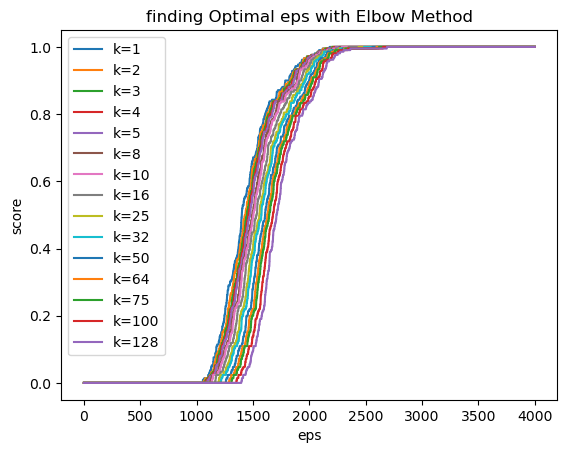

Image Cluster Labels (DBSCAN):
Image 1: Cluster 0
Image 2: Cluster 0
Image 3: Cluster 0
Image 4: Noise
Image 5: Cluster 0
Image 6: Cluster 0
Image 7: Cluster 0
Image 8: Cluster 0
Image 9: Cluster 0
Image 10: Cluster 0
Image 11: Cluster 0
Image 12: Cluster 0
Image 13: Cluster 0
Image 14: Cluster 0
Image 15: Cluster 0
Image 16: Cluster 0
Image 17: Cluster 0
Image 18: Cluster 0
Image 19: Cluster 0
Image 20: Cluster 0
Image 21: Cluster 0
Image 22: Cluster 0
Image 23: Cluster 0
Image 24: Cluster 0
Image 25: Cluster 0
Image 26: Noise
Image 27: Cluster 0
Image 28: Cluster 0
Image 29: Cluster 0
Image 30: Noise
Image 31: Cluster 0
Image 32: Cluster 0
Image 33: Cluster 0
Image 34: Cluster 0
Image 35: Noise
Image 36: Cluster 0
Image 37: Cluster 0
Image 38: Cluster 0
Image 39: Cluster 0
Image 40: Cluster 0
Image 41: Cluster 0
Image 42: Cluster 0
Image 43: Cluster 0
Image 44: Cluster 0
Image 45: Cluster 0
Image 46: Cluster 0
Image 47: Cluster 0
Image 48: Cluster 0
Image 49: Cluster 0
Image 50: Clus

In [85]:
# Load extracted features from .npy file
features_array = np.load("extracted_features.npy")

# Function to find the optimal eps using the elbow method
def find_optimal_eps(k_values, eps_candidates, features):
    elbow_scores = []
    for k in k_values:
        knn_distances = calculate_knn_distances(features, k)
        knn_distances = np.sort(knn_distances)
        elbow_scores.append([])

        for eps in eps_candidates:
            score = np.mean(knn_distances <= eps)
            elbow_scores[-1].append(score)
        plt.plot(eps_candidates, elbow_scores[-1], label=f"k={k}")


    elbow_indices = [np.argmax(np.diff(scores)) for scores in elbow_scores]
    optimal_k_index = np.argmax([scores[idx] for scores, idx in zip(elbow_scores, elbow_indices)])
    optimal_eps_index = elbow_indices[optimal_k_index]
    return k_values[optimal_k_index], eps_candidates[optimal_eps_index]

# Function to calculate the average distances to the k nearest neighbors
def calculate_knn_distances(features, k):
    distances = []
    for i, point in enumerate(features):
        distances.append(np.mean(np.sort(np.linalg.norm(features - point, axis=1))[1:k+1]))
    return np.array(distances)

# Function to find the optimal min_samples using silhouette score
def find_optimal_min_samples(features, eps_range, min_samples_range):
    best_min_samples = 1
    best_silhouette_avg = 0
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps_range, min_samples=min_samples)
        dbscan.fit(features)
        silhouette_avg = silhouette_score(features, dbscan.labels_)
        if silhouette_avg > best_silhouette_avg:
            best_silhouette_avg = silhouette_avg
            best_min_samples = min_samples
    return best_min_samples, best_silhouette_avg

# Elbow method parameters
k_values = [1, 2, 3, 4, 5, 8, 10, 16, 25, 32, 50, 64, 75, 100, 128]
eps_candidates = np.linspace(0.1, 4000, 10000)

# Find optimal eps using elbow method
optimal_k, optimal_eps = find_optimal_eps(k_values, eps_candidates, features_array)

print(f"Optimal k value: {optimal_k}")
print(f"Optimal eps value: {optimal_eps}")

# Range for min_samples parameter
min_samples_range = range(1, 20)

# Find optimal min_samples using silhouette score
optimal_min_samples, optimal_silhouette_score = find_optimal_min_samples(features_array, optimal_eps, min_samples_range)

print(f"Chosen min_samples value: {optimal_min_samples}")
print(f"Silhouette Score: {optimal_silhouette_score:.4f}")

# Perform DBSCAN clustering with the best parameters
dbscan = DBSCAN(eps=optimal_eps, min_samples=optimal_min_samples)
dbscan.fit(features_array)

# Visualization (optional)
plt.xlabel("eps")
plt.ylabel("score")
plt.title("finding Optimal eps with Elbow Method")
plt.legend()
plt.show()

# Print cluster labels for each image
print("Image Cluster Labels (DBSCAN):")
for i, label in enumerate(dbscan.labels_):
    print(f"Image {i+1}: {'Cluster ' + str(label) if label != -1 else 'Noise'}")
    
# Save DBSCAN labels to a file for later use in dimensionality reduction
np.save("dbscan_cluster_labels.npy", dbscan.labels_)


### Question 4

K-Means:
    K-Means is a centroid-based clustering algorithm that partitions the data into K clusters based on similarity.
    It initializes K centroids randomly and assigns each data point to the nearest centroid, then updates the centroids by computing the mean of the data points assigned to each cluster.
    Pros:
        Simple and easy to implement.
        Efficient for large datasets with a moderate number of clusters.
        Works well when clusters are well-separated and have a roughly spherical shape.
    Cons:
        Requires the number of clusters (K) to be specified in advance, which can be challenging if the optimal K is unknown.
        Sensitive to the initial random choice of centroids, which can lead to different results on different runs.
        Prone to convergence to local optima.
        
DBSCAN (Density-Based Spatial Clustering of Applications with Noise):
    DBSCAN is a density-based clustering algorithm that groups together data points that are closely packed, while marking outliers as noise.
    It defines clusters as areas of high density separated by areas of low density.
    Pros:
        Can find arbitrarily shaped clusters and is robust to noise and outliers.
        Does not require the number of clusters to be specified in advance.
        Automatically determines the number of clusters based on the data density.
    Cons:
        Sensitive to the choice of parameters such as epsilon (eps) and min_samples.
        May struggle with datasets of varying densities or with high-dimensional data.
        Computationally more expensive than K-Means, especially for large datasets.

### Question 5

A silhouette score-based method is employed to determine the optimal number of clusters (K) for K-Means clustering. By iterating through a range of K values, performing K-Means clustering for each value, computing the silhouette score, and selecting the K value with the highest silhouette score as the best suitable K. This approach ensures the generation of meaningful clusters, enhancing the quality of the clustering results.

### Question 6

K-means:
    Identified two distinct clusters (Cluster 0 and 1).
    Predominantly assigned the images to Cluster 0, with fewer assigned to Cluster 1.
    Best value of k found: 2
    Silhouette Score for best k: 0.11673043

DBSCAN:
    Identified one main cluster (Cluster 0) and labeled several data points as "Noise" or outliers that did not belong to any cluster.
    Predominantly assigned the images to Cluster 0, with fewer labeled as "Noise".
    Optimal eps value: 1657.424302430243
    Chosen min_samples value: 8
    Silhouette Score: 0.1466

Both K-Means and DBSCAN achieved positive silhouette scores, indicating reasonable cluster cohesion and separation. However, DBSCAN exhibited a slightly higher silhouette score, suggesting that its clustering configuration resulted in clusters with better-defined boundaries and compactness


## Dimensionality Reduction

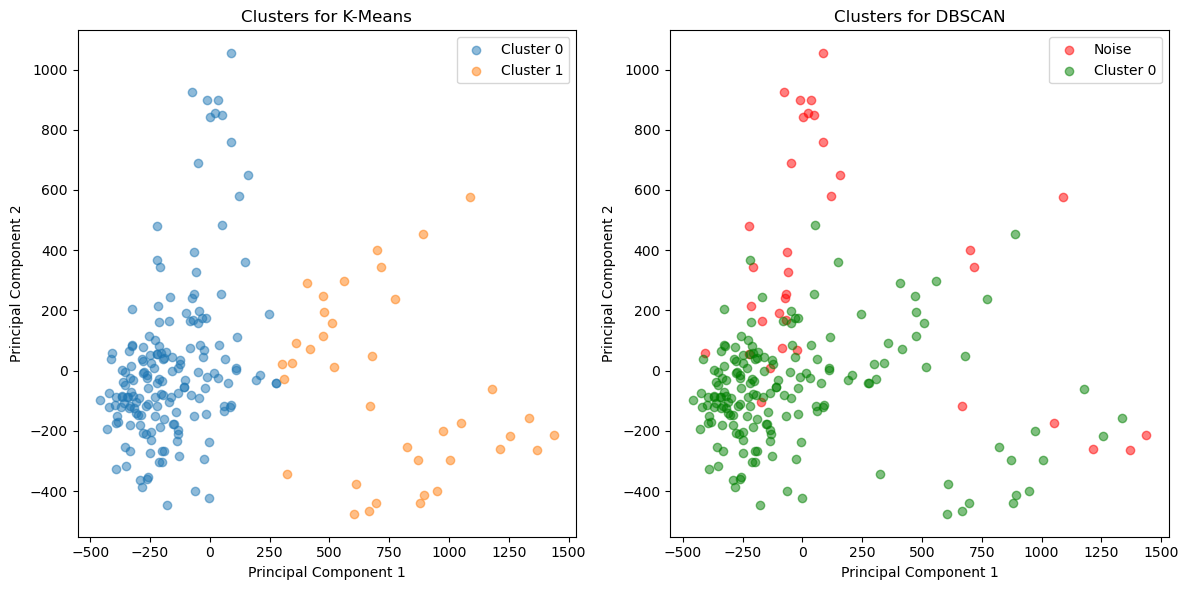

In [86]:
# Load the extracted feature vectors and cluster labels
features_array = np.load("extracted_features.npy")
cluster_labels_kmeans = np.load("kmeans_cluster_labels.npy")
cluster_labels_dbscan = np.load("dbscan_cluster_labels.npy")

# Apply PCA to reduce the dimensionality of the feature vectors
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features_array)

# Plot clusters for KMeans
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for label in np.unique(cluster_labels_kmeans):
    plt.scatter(reduced_features[cluster_labels_kmeans == label, 0], 
                reduced_features[cluster_labels_kmeans == label, 1],
                label=f'Cluster {label}' if label != -1 else 'Noise',
                alpha=0.5)
plt.title('Clusters for K-Means')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

# Plot clusters for DBSCAN
plt.subplot(1, 2, 2)
for label in np.unique(cluster_labels_dbscan):
    if label == -1:
        # Plot Noise points in red
        plt.scatter(reduced_features[cluster_labels_dbscan == label, 0], 
                    reduced_features[cluster_labels_dbscan == label, 1],
                    label='Noise',
                    color='red',
                    alpha=0.5)
    else:
        # Plot Cluster points with different colors
        plt.scatter(reduced_features[cluster_labels_dbscan == label, 0], 
                    reduced_features[cluster_labels_dbscan == label, 1],
                    label=f'Cluster {label}',
                    color='green' ,
                    alpha=0.5)
plt.title('Clusters for DBSCAN')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

plt.tight_layout()
plt.show()


### Question 7

Principal Component Analysis (PCA) is a dimensionality reduction technique commonly used in machine learning and data analysis. Its primary objective is to reduce the dimensionality of high-dimensional data while preserving most of its variance and relevant information.

Here's how PCA functions:

1. Data Centering: PCA starts by centering the data by subtracting the mean from each feature. This step ensures that the data is centered around the origin.

2. Covariance Matrix Computation: PCA then computes the covariance matrix of the centered data. The covariance matrix summarizes the relationships between different features and provides information about their joint variability.

3. Eigenvalue Decomposition: Next, PCA performs eigenvalue decomposition or singular value decomposition (SVD) on the covariance matrix to obtain its eigenvectors and eigenvalues. Eigenvectors represent the directions in feature space where the data varies the most, while eigenvalues indicate the magnitude of variance along each eigenvector.

4. Selection of Principal Components: PCA sorts the eigenvectors based on their corresponding eigenvalues in descending order. The eigenvectors with the highest eigenvalues (known as principal components) capture the most variance in the data and are selected to form the new feature space.

5. Projection: Finally, PCA projects the original data onto the subspace spanned by the selected principal components. This projection results in a lower-dimensional representation of the data, where each observation is described by a reduced set of features, while retaining as much variance as possible from the original data.

By transforming the data into a lower-dimensional space, PCA enables visualization, compression, and computational efficiency in subsequent analysis tasks. It is widely used for exploratory data analysis, feature engineering, and dimensionality reduction in various fields, including image processing, genetics, finance, and pattern recognition.

## Evaluation and Analysis

In [87]:
# Load the true labels from the CSV file
true_labels_df = pd.read_csv("flower_images/flower_labels.csv")

# Assuming the labels are in a column named 'label', you can extract them like this:
true_labels = true_labels_df['label'].values

# Calculate homogeneity score for KMeans clustering
homogeneity_kmeans = homogeneity_score(true_labels, cluster_labels_kmeans)
print(f"Homogeneity Score for KMeans: {homogeneity_kmeans:.4f}")

# Calculate silhouette score for KMeans clustering
silhouette_kmeans = silhouette_score(features_array, cluster_labels_kmeans)
print(f"Silhouette Score for KMeans: {silhouette_kmeans:.4f}")

# Calculate homogeneity score for DBSCAN clustering
homogeneity_dbscan = homogeneity_score(true_labels, cluster_labels_dbscan)
print(f"Homogeneity Score for DBSCAN: {homogeneity_dbscan:.4f}")

# Calculate silhouette score for DBSCAN clustering
silhouette_dbscan = silhouette_score(features_array, cluster_labels_dbscan)
print(f"Silhouette Score for DBSCAN: {silhouette_dbscan:.4f}")


Homogeneity Score for KMeans: 0.1815
Silhouette Score for KMeans: 0.1167
Homogeneity Score for DBSCAN: 0.0380
Silhouette Score for DBSCAN: 0.1466


### Question 8

Homogeneity Score: Homogeneity measures the degree to which each cluster contains only data points that are members of a single class. It evaluates the purity of clusters by comparing them to the ground truth labels (if available). The homogeneity score ranges from 0 to 1, where 1 indicates perfect homogeneity (all clusters contain only data points from a single class), and lower values suggest mixing of different classes within clusters.

The formula to calculate homogeneity score for a clustering result is:
    H = 1 − H(Y∣C)/H(Y)

Where:
    H(Y∣C) is the conditional entropy of the class labels given the cluster assignments.
    H(Y) is the entropy of the class labels.

Silhouette Score: Silhouette score measures the quality of clustering by assessing the cohesion and separation of clusters. It computes the average silhouette coefficient for each data point, which represents how similar the point is to its own cluster compared to other clusters. A higher silhouette score indicates better clustering, with well-defined and separated clusters.

The silhouette coefficient for a single data point ii is calculated as:
    s(i) = (b(i)−a(i))/max(a(i),b(i))

Where:
    a(i) is the average distance from ii to other data points in the same cluster.
    b(i) is the smallest average distance from ii to data points in any other cluster.

The silhouette score for the entire dataset is the mean of silhouette coefficients for all data points.

Both homogeneity and silhouette scores provide insights into the quality of clustering results, with homogeneity focusing on the purity of clusters regarding class labels and silhouette score emphasizing the cohesion and separation of clusters. These metrics are useful for evaluating clustering algorithms and selecting the optimal parameters for clustering tasks.

### Question 9

K-Means:
    Homogeneity Score: 0.1815
    Silhouette Score: 0.1167

DBSCAN:
    Homogeneity Score: 0.0380
    Silhouette Score: 0.1466

Homogeneity Score Analysis:
    The homogeneity score measures the purity of clusters with respect to the ground truth labels (if available). It evaluates the extent to which each cluster contains only data points from a single class.
    In this scenario, K-Means achieved a significantly higher homogeneity score of 0.1815 compared to DBSCAN's score of 0.0380. This indicates that K-Means produced clusters with higher purity, where each cluster contains a larger proportion of data points from the same class.

Silhouette Score Analysis:
    The silhouette score measures the quality of clustering by assessing both the cohesion and separation of clusters. A higher silhouette score indicates better-defined clusters with higher intra-cluster similarity and lower inter-cluster dissimilarity.
    DBSCAN obtained a higher silhouette score of 0.1466 compared to K-Means' score of 0.1167. This suggests that the clusters generated by DBSCAN exhibit slightly better cohesion and separation than those produced by K-Means.

While K-Means performed better in terms of homogeneity score, indicating more homogeneous clusters, DBSCAN outperformed K-Means in terms of silhouette score, suggesting better-defined clusters with higher intra-cluster similarity.

### Question 10

To improve the performance of clustering models such as K-Means and DBSCAN, several approaches can be considered:

1. Feature Engineering:
    Experiment with different feature extraction techniques or preprocess the data to enhance the quality of features used for clustering. Feature scaling, dimensionality reduction, or extracting more informative features can lead to better clustering results.

2. Parameter Tuning:
    Optimize the hyperparameters of the clustering algorithms, such as the number of clusters (K) for K-Means and the epsilon (eps) and min_samples for DBSCAN. Grid search or randomized search techniques can help identify the best parameters for the given dataset.

3. Data Preprocessing:
    Cleanse the data by addressing missing values, outliers, or irrelevant features that may negatively impact clustering performance. Standardize or normalize the data to ensure that all features contribute equally to the clustering process.

4. Ensemble Clustering:
    Combine multiple clustering algorithms or ensemble methods to leverage the strengths of different approaches. For example, combining K-Means with hierarchical clustering or DBSCAN with density-based clustering techniques can lead to more robust clustering results.

5. Density Estimation:
    Utilize density estimation techniques to identify underlying patterns or structures in the data. Kernel density estimation (KDE) or Gaussian mixture models (GMM) can help capture complex density distributions and improve the clustering performance, especially in datasets with irregular shapes or varying densities.

6. Outlier Detection:
    Incorporate outlier detection methods to identify and handle noise or outliers effectively. Outliers can significantly impact clustering results, so robust outlier detection techniques such as Local Outlier Factor (LOF) or Isolation Forest can help improve the quality of clusters.

7. Visualization and Interpretation:
    Visualize the clustering results to gain insights into the underlying structure of the data and assess the quality of clusters. Utilize dimensionality reduction techniques such as PCA or t-SNE to visualize high-dimensional data in 2D or 3D space and interpret the clustering results more effectively.

8. Evaluation Metrics:
    Use a comprehensive set of evaluation metrics to assess the performance of clustering models objectively. Besides silhouette score and homogeneity score, consider other metrics such as completeness score, adjusted Rand index, or Davies–Bouldin index to gain a more nuanced understanding of clustering performance.